In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


# Normally predicting the val

In [6]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# scaling the vals 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

tnf = ColumnTransformer([
    ('trf1', StandardScaler(), ['cgpa', 'placement_exam_marks'])
])

In [8]:
trfd_xtrain = tnf.fit_transform(x_train)
trfd_xtest = tnf.transform(x_test)

In [9]:
# predicting the vals 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(trfd_xtrain, y_train)
clf2.fit(trfd_xtrain, y_train)

pred = clf.predict(trfd_xtest)
pred2 = clf2.predict(trfd_xtest)

print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, pred2))

0.535
0.495


In [10]:
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(estimator=clf, X=trfd_xtrain, y=y_train, cv=10)))
print(np.mean(cross_val_score(estimator=clf2, X=trfd_xtrain, y=y_train, cv=10)))

0.5149999999999999
0.46125


# After treating the outliers

<Axes: xlabel='cgpa', ylabel='Count'>

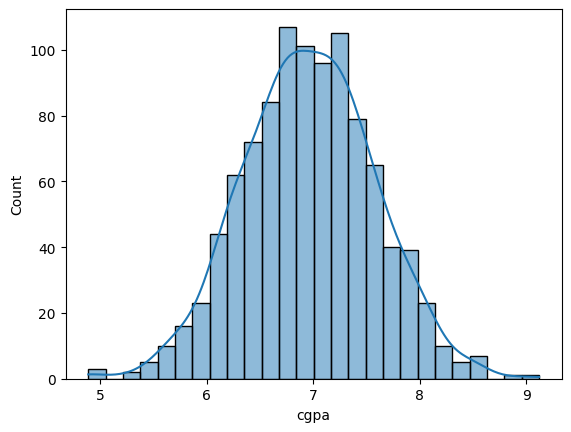

In [11]:
sns.histplot(df['cgpa'], kde=True)

In [12]:
# to find outliers - 1 
# using standard scaler

sclr = StandardScaler()
new_df = sclr.fit_transform(pd.DataFrame(df['cgpa']))
new_df[new_df < -3]

array([-3.31590913, -3.36464288, -3.34839829])

In [13]:
# outliers - 2 (using z score formula --- xi - mean / std)

new_df = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()
new_df[new_df < -3]

485   -3.314251
997   -3.362960
999   -3.346724
Name: cgpa, dtype: float64

In [14]:
# outliers - 3 (using the normal curve)
# max - mean +/- 3*std

mean_val = df['cgpa'].mean()
std_val = df['cgpa'].std()

maxi = mean_val + 3*std_val
mini = mean_val - 3*std_val

outliers = df[(df['cgpa'] > maxi) | (df['cgpa'] < mini)]

# Treating outliers - Trimming

In [15]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
maxi = (x_train['cgpa'].mean()) + (3*(x_train['cgpa'].std()))
mixi = (x_train['cgpa'].mean()) - (3*(x_train['cgpa'].std()))


cleaned_xtrain = x_train[(x_train['cgpa'] < maxi) & (x_train['cgpa'] > mini)]
cleaned_ytrain = y_train[(x_train['cgpa'] < maxi) & (x_train['cgpa'] > mini)]

In [33]:
cleaned_ytrain

29     1
535    0
695    1
557    0
836    1
      ..
106    0
270    1
860    0
435    0
102    1
Name: placed, Length: 796, dtype: int64

In [18]:
maxi = x_train['cgpa'].mean() + 3*(x_train['cgpa'].std())
mixi = x_train['cgpa'].mean() - 3*(x_train['cgpa'].std())

cleaned_xtest = x_test[(x_test['cgpa'] < maxi) & (x_test['cgpa'] > mini)]
cleaned_ytest = y_test[(x_test['cgpa'] < maxi) & (x_test['cgpa'] > mini)]

In [19]:
cleaned_ytest.shape

(199,)

In [20]:
trf = ColumnTransformer([
    ('tnf1', StandardScaler(), ['cgpa', 'placement_exam_marks'])
])

In [21]:
trfd_xtrain = trf.fit_transform(cleaned_xtrain)
trfd_xtest = trf.transform(cleaned_xtest)

In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(trfd_xtrain, cleaned_ytrain)
clf2.fit(trfd_xtrain, cleaned_ytrain)

pred = clf.predict(trfd_xtest)
pred2 = clf2.predict(trfd_xtest)

print(accuracy_score(cleaned_ytest, pred))
print(accuracy_score(cleaned_ytest, pred2))


0.5577889447236181
0.5025125628140703


In [23]:
print(np.mean(cross_val_score(estimator=clf, X=trfd_xtrain, y=cleaned_ytrain, cv=10)))
print(np.mean(cross_val_score(estimator=clf2, X=trfd_xtrain, y=cleaned_ytrain, cv=10)))

0.5025632911392405
0.45469936708860753


# Capping

In [24]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
maxi = (x_train['cgpa'].mean()) + (3*(x_train['cgpa'].std()))
mixi = (x_train['cgpa'].mean()) - (3*(x_train['cgpa'].std()))

x_train['cgpa'] = np.where(
    x_train['cgpa'] > maxi,
    maxi,
    np.where(
        x_train['cgpa'] < mini,
        mini,
        x_train['cgpa']
    )
)


x_test['cgpa'] = np.where(
    x_test['cgpa'] > maxi,
    maxi,
    np.where(
        x_test['cgpa'] < mini,
        mini,
        x_test['cgpa']
    )
)


In [26]:
trf = ColumnTransformer([
    ('tnf1', StandardScaler(), ['cgpa', 'placement_exam_marks'])
])

In [27]:
trfd_xtrain = trf.fit_transform(x_train)
trfd_xtest = trf.transform(x_test)

In [28]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(trfd_xtrain, y_train)
clf2.fit(trfd_xtrain, y_train)

pred = clf.predict(trfd_xtest)
pred2 = clf2.predict(trfd_xtest)

print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, pred2))


0.545
0.505


In [30]:
print(np.mean(cross_val_score(estimator=clf, X=trfd_xtrain, y=y_train, cv=10)))
print(np.mean(cross_val_score(estimator=clf2, X=trfd_xtrain, y=y_train, cv=10)))

0.5137499999999999
0.45999999999999996
